In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
import itertools as it

Само ДЗ делать в jupyter notebook.
Нужно провести разведочный анализ данных. Разведочный анализ включает следующие шаги:
1. Предварительный просмотр данных
2. Проверьте общее количество записей и типов столбцов
3. Проверьте любые нулевые значения
4. Проверьте дубликаты записей
5. График распределения числовых данных (одномерное и парное совместное распределение)
6. Распределение количества данных категориальных данных
7. каждый пункт должен сопровождаться комментариями, без комментария о том, что вы наблюдаете и какие выводы делаете на основе полученных данных, пункт засчитываться не будет. Для комментариев и выводов используйте тип ячеек markdown.

___
Данные датасеты сделаны так, что в них категориальные признаки переобозначены цифрами, расшифровка есть на сайте kaggle [Линк](https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016). Числовых данных я не увидел (возможно, просто пропустил)

In [79]:
char = pd.read_csv('data/caracteristics.csv', low_memory=False,  encoding="latin-1")
users = pd.read_csv('data/users.csv', low_memory=False, encoding="latin-1")
places = pd.read_csv('data/places.csv', low_memory=False, encoding="latin-1")
holidays = pd.read_csv('data/holidays.csv')

In [80]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ds       132 non-null    object
 1   holiday  132 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [81]:
holidays.head()

ds                holiday
0  2005-01-01               New year
1  2005-03-28          Easter Monday
2  2005-05-01             Labour Day
3  2005-05-05     Ascension Thursday
4  2005-05-08  Victory in Europe Day

Это просто даты праздников, их потом можно будет использовать соотнося, например, с данными в *caracteristics.csv*

### *caracteristics.csv*

In [82]:
char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   an       839985 non-null  int64  
 2   mois     839985 non-null  int64  
 3   jour     839985 non-null  int64  
 4   hrmn     839985 non-null  int64  
 5   lum      839985 non-null  int64  
 6   agg      839985 non-null  int64  
 7   int      839985 non-null  int64  
 8   atm      839930 non-null  float64
 9   col      839974 non-null  float64
 10  com      839983 non-null  float64
 11  adr      699443 non-null  object 
 12  gps      366226 non-null  object 
 13  lat      362471 non-null  float64
 14  long     362467 non-null  object 
 15  dep      839985 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB


В char есть пробелы, согласно карте в описании датасетов, эти колонки отвечают географической локации, где произошла авария, поэтому, я считаю, что в данном случае некорректно дополнять пробелы самостоятельно. Впринципе, можно обойтись и без этих данных, просто исключив их из рассмотрения. Да, нельзя будет выявить самое опасное место во Франции по числу аварий, но, как мне кажется, это лучше чем обрезать половину датасета.

In [83]:
char.drop(columns=['gps', 'lat', 'long', 'adr'], inplace=True)
char.drop_duplicates(inplace=True)

In [84]:
char.shape

(839985, 12)

Дубликатов не было, судя по размеру. 
Посмотрим на остальные пропуски

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1714dc9ac0>,
      dtype=object)

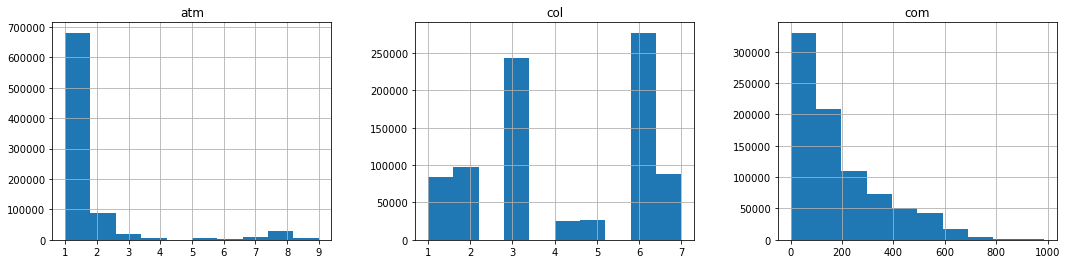

In [85]:
char.hist(column=['atm', 'col', 'com'], figsize=(18, 4), layout=(1, 3))

Осадки заполним по максимальному выпадению. Два других параметра, имеющих пропуски это код [INSEE](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B4_INSEE) и тип столкновения. С типом столкновения, вроде понятно как быть, нужно посмотреть по id сколько объектов участвовало в аварии и уже исходя из этого сгенерировать пропущенное значение. Однако, так как число пропущенных значений составляет < 1% от всех данных, я думаю, проще будет просто убрать их из датасетов.

In [86]:
char.atm.fillna(value=1, inplace=True) # Оно всего одно, я заполнил его самым частым

In [87]:
index_com = char.Num_Acc[char.col.apply(np.isnan)]
index_col = char.Num_Acc[char.com.apply(np.isnan)]
index_to_del = list(index_com.index) + list(index_col.index)
index_num_acc = list(index_com) + list(index_col)

In [88]:
char.drop(index=index_to_del, inplace=True)

In [89]:
char.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839972 entries, 0 to 839984
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839972 non-null  int64  
 1   an       839972 non-null  int64  
 2   mois     839972 non-null  int64  
 3   jour     839972 non-null  int64  
 4   hrmn     839972 non-null  int64  
 5   lum      839972 non-null  int64  
 6   agg      839972 non-null  int64  
 7   int      839972 non-null  int64  
 8   atm      839972 non-null  float64
 9   col      839972 non-null  float64
 10  com      839972 non-null  float64
 11  dep      839972 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 83.3 MB


Я сохранил индексы Num_Acc потому что их нужно также вывести из других датасетов

In [90]:
def index_to_drop(df, values_to_check):
    '''Найдет все индексы в df, где элемент df будет равен values_to_check '''
    return [item for i in values_to_check for item in df[df == i].index]

In [91]:
users.drop(index=index_to_drop(users.Num_Acc, index_num_acc), inplace=True)
places.drop(index=index_to_drop(places.Num_Acc, index_num_acc), inplace=True)

Проверим нулевые значения

In [92]:
char.eq(0).any()

Num_Acc    False
an         False
mois       False
jour       False
hrmn       False
lum        False
agg        False
int         True
atm        False
col        False
com         True
dep        False
dtype: bool

В двух колонках они есть, посмотрим сколько их

In [93]:
char.int.eq(0).sum(), char.com.eq(0).sum()

(106, 1)

В столбце *com* всего одно значение равно нулю, чего не должно быть, так как оно всего одно, просто заполним его медианным значением

In [94]:
char.com.replace(to_replace=0, value=char.com.median, inplace=True)

Со столбцом *int* дело чуть хуже, потому что оно характеризует тип места, в котором произошла авария (тип перекрестка). Оно согласно описанию тоже не может быть нулем, чтобы понять как лучше восполнить пробелы посмотрим на гистограмму

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1706038ca0>]],
      dtype=object)

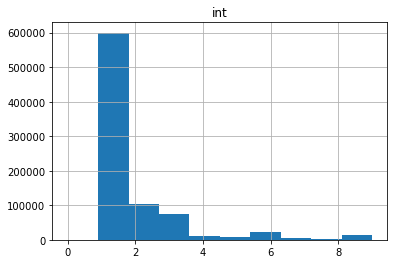

In [95]:
char.hist(column=['int'])

То есть подавляющее большинство столкновений произошло (1 - Out of intersection) вне разветвлений и поворотов, а просто на прямой?! Тут отличие в числах очень большое, наверное, не будет большой ошибкой, если заполнить нули этим значением.

In [96]:
char.int.replace(to_replace=0, value=1, inplace=True)

In [97]:
char.eq(0).any()

Num_Acc    False
an         False
mois       False
jour       False
hrmn       False
lum        False
agg        False
int        False
atm        False
col        False
com        False
dep        False
dtype: bool

In [98]:
char.head(2)

Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col com  dep
0  201600000001  16     2     1  1445    1    2    1  8.0  3.0   5  590
1  201600000002  16     3    16  1800    1    2    6  1.0  6.0   5  590

Теперь попробуем погруппировать наши данные и посмотреть на распределения (пока я сделаю независимо для каждого датасета, чтобы поизучать их, впоследствии уже начну их объединять).

Посмотрим, например, на количество аварий по часам, тут опять же не совсем удобно записано время (с минутами), сделаем новую колонку где будут значения часа

In [99]:
char['hour'] = char['hrmn'].astype(str)

In [100]:
char.hour = char.hour.apply(lambda x: int(x.zfill(4)[:2]))

In [101]:
char.hour.unique()

array([14, 18, 19, 11, 10,  8, 16, 12,  7, 20, 15,  9,  5, 13, 17, 21,  3,
        6, 22,  2,  1,  4, 23,  0])

In [102]:
by_hours = char.groupby('hour')['Num_Acc'].count()

In [103]:
def plot_bar(ser, title, xlabels=None):
    plt.figure()
    ax = plt.subplot(111)

    bars = ax.bar(ser.index, ser.values)
    ax.set_xticks(ser.index)
    ax.set_title(title)
    if xlabels:
        ax.set_xticklabels(xlabels, rotation=-60)
    for val, bar in zip(ser.values, bars):
        norm = matplotlib.colors.Normalize(ser.min(), ser.max())
        bar.set_color(plt.cm.Spectral_r(norm(val)))

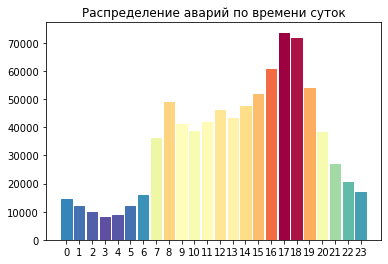

In [104]:
plot_bar(by_hours, 'Распределение аварий по времени суток')

Видимо, большинство аварий случаются, вечером, когда люди возвращаются домой. 
Посмотрим еще на динамику аварий по годам и атмосферным условиям. Сначала по годам

In [105]:
year = char.groupby('an')['Num_Acc'].count()

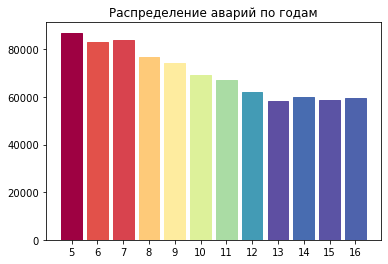

In [106]:
plot_bar(year, 'Распределение аварий по годам')

Начиная с 2013 года, число аварий перестало уменьшаться и вышло на некоторое плато.

Посмотрим при каких условия происходили аварии в каждый из годов

In [107]:
labels = ['Normal', 'Light rain', 'Heavy rain', 'Snow - hail', 'Fog - smoke', 'Strong wind - storm', 'Dazzling weather', 'Cloudy weather', 'Other'] 

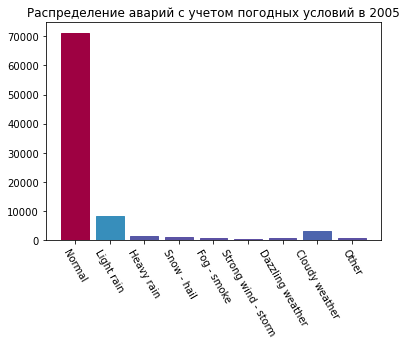

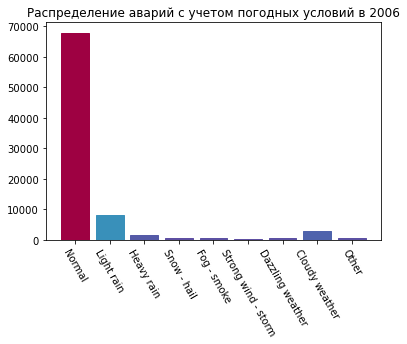

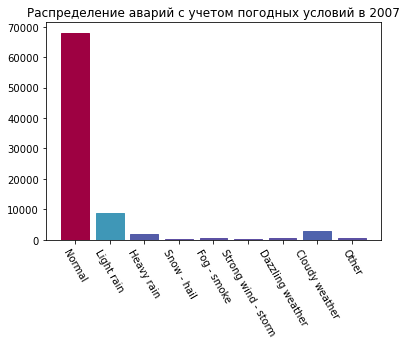

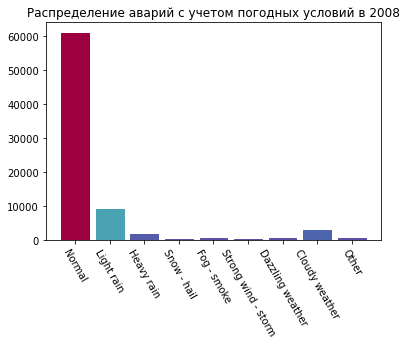

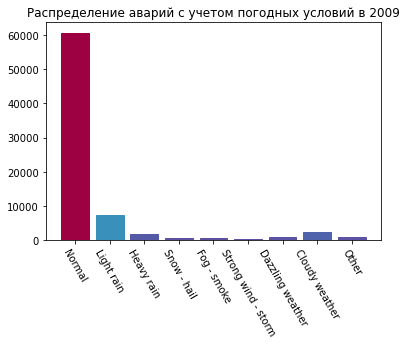

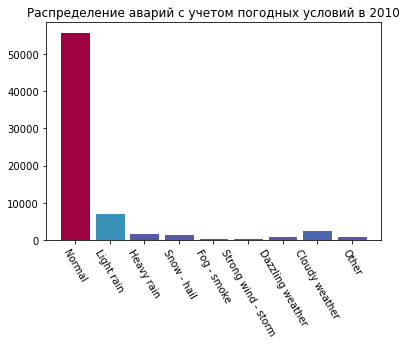

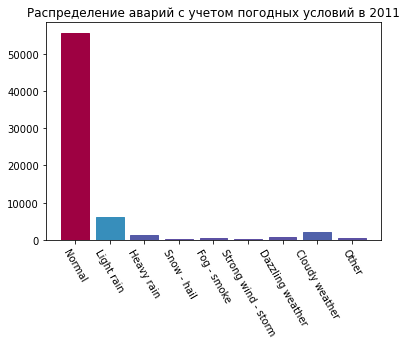

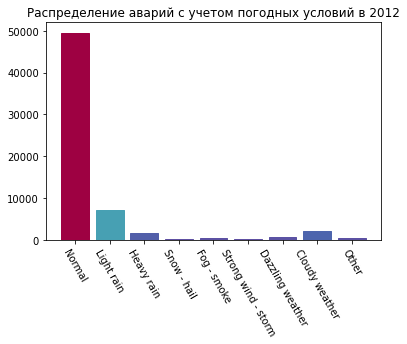

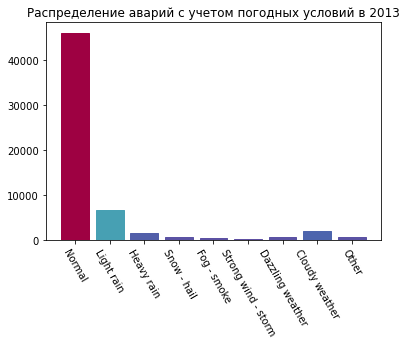

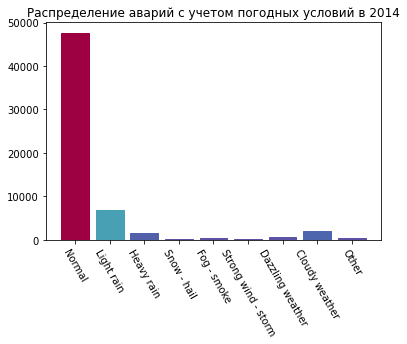

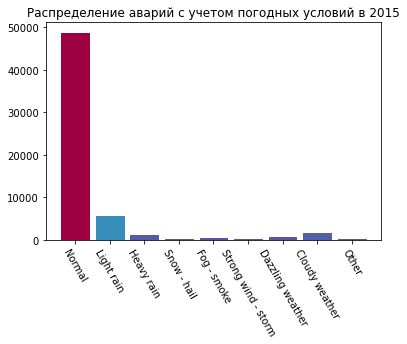

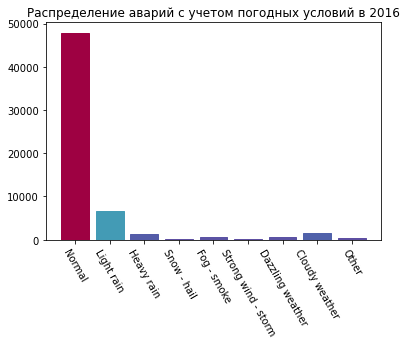

In [108]:
for an in year.index:
    temp = char.loc[char.an == an].groupby(['atm'])['Num_Acc'].count()
    if an < 10:
        title = f'200{an}'
    else:
        title = f'20{an}'
    plot_bar(temp, f'Распределение аварий с учетом погодных условий в {title}', labels)

Картина аварий из-за погодных условий не сильно меняется из года в год. Большинство случаев происходят при нормальных условиях, что немного странно. Либо во Франции погода почти без дождей большую часть времени, либо французы никуда не выходят в непогоду

### *users.csv*

In [109]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875975 entries, 0 to 1876004
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Num_Acc  int64  
 1   place    float64
 2   catu     int64  
 3   grav     int64  
 4   sexe     int64  
 5   trajet   float64
 6   secu     float64
 7   locp     float64
 8   actp     float64
 9   etatp    float64
 10  an_nais  float64
 11  num_veh  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 186.1+ MB


In [110]:
users.head(10)

Num_Acc  place  catu  grav  sexe  trajet  secu  locp  actp  etatp  \
0  201600000001    1.0     1     1     2     0.0  11.0   0.0   0.0    0.0   
1  201600000001    1.0     1     3     1     9.0  21.0   0.0   0.0    0.0   
2  201600000002    1.0     1     3     1     5.0  11.0   0.0   0.0    0.0   
3  201600000002    2.0     2     3     1     0.0  11.0   0.0   0.0    0.0   
4  201600000002    3.0     2     3     2     0.0  11.0   0.0   0.0    0.0   
5  201600000003    1.0     1     1     1     1.0  11.0   0.0   0.0    0.0   
6  201600000003    NaN     3     3     1     5.0   NaN   6.0   2.0    1.0   
7  201600000004    1.0     1     3     1     5.0  23.0   0.0   0.0    0.0   
8  201600000004    2.0     2     4     1     0.0  23.0   0.0   0.0    0.0   
9  201600000004    1.0     1     1     2     0.0  11.0   0.0   0.0    0.0   

   an_nais num_veh  
0   1983.0     B02  
1   2001.0     A01  
2   1960.0     A01  
3   2000.0     A01  
4   1962.0     A01  
5   1997.0     A01  
6   1970.0     A01  
7   1999.0     B02  
8   1999.0     B02  
9   1985.0     A01

Тут в некоторых местах нет информации о месте человека и средствах безопасности (ремень, шлем, детское кресло), а также было ли оно использовано. Это тоже нормально, поскольку в этом случае человек является пешеходом, что видно по столбцу **catu** и **actp**.


Пропуски в **place** можно заменить нулями. Поле **secu** - средства защиты, можно определить как 93 (9-other, 3-not determinable), так как это пешеходы.  Однако, есть и "4 тип людей" - это пешеходы на роликах или скуттере, для них  поле **catu**=4. Соотвественно, для них возможно ношение шлема 21 (2-шлем, 1-надет)

In [111]:
users.place.fillna(value=0, inplace=True)

# Ролики 
users.loc[users.catu == 4, 'secu'] = users[users.catu == 4].secu.fillna(value=np.random.choice([21, 93]))

# Оставшиеся пешеходы
users.loc[users.place == 0, 'secu'] = users[users.place == 0].secu.fillna(value=np.random.choice([93]))

In [112]:
# Остальные пока заменим так, обработаем подробнее ниже
users.secu.fillna(value=0, inplace=True)

In [113]:
users.head(10)

Num_Acc  place  catu  grav  sexe  trajet  secu  locp  actp  etatp  \
0  201600000001    1.0     1     1     2     0.0  11.0   0.0   0.0    0.0   
1  201600000001    1.0     1     3     1     9.0  21.0   0.0   0.0    0.0   
2  201600000002    1.0     1     3     1     5.0  11.0   0.0   0.0    0.0   
3  201600000002    2.0     2     3     1     0.0  11.0   0.0   0.0    0.0   
4  201600000002    3.0     2     3     2     0.0  11.0   0.0   0.0    0.0   
5  201600000003    1.0     1     1     1     1.0  11.0   0.0   0.0    0.0   
6  201600000003    0.0     3     3     1     5.0  93.0   6.0   2.0    1.0   
7  201600000004    1.0     1     3     1     5.0  23.0   0.0   0.0    0.0   
8  201600000004    2.0     2     4     1     0.0  23.0   0.0   0.0    0.0   
9  201600000004    1.0     1     1     2     0.0  11.0   0.0   0.0    0.0   

   an_nais num_veh  
0   1983.0     B02  
1   2001.0     A01  
2   1960.0     A01  
3   2000.0     A01  
4   1962.0     A01  
5   1997.0     A01  
6   1970.0     A01  
7   1999.0     B02  
8   1999.0     B02  
9   1985.0     A01

Посмотрим на нулевые значения


In [114]:
users.eq(0).any()

Num_Acc    False
place       True
catu       False
grav       False
sexe       False
trajet      True
secu        True
locp        True
actp        True
etatp       True
an_nais    False
num_veh    False
dtype: bool

Нули в *locp*, *actp*, *etatp* объяснимы - точно так же как и я обозначил за 0 значения в столбце *place*, то есть это ситуации, в которых не участвовал пешеход. В тех случаях, когда он был значения в этих трех колонках ненулевые. 

В колонке *secu* нулей быть не должно, так же как и в *trajet* (именно такой колонки нет в описании, но значениям данных вероятно это колонка trip), снова посмотрим на гистораммы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f170a784100>,
      dtype=object)

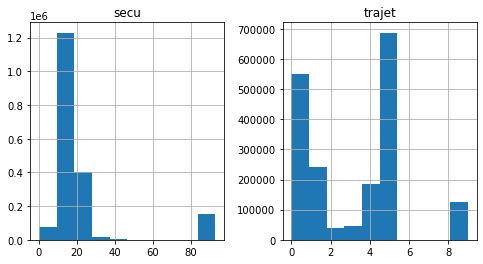

In [115]:
users.hist(column=['trajet', 'secu'], figsize=(8, 4))

Сначала с *secu*, несмотря на распределение, тут мне хотелось бы дополнить данные немного по особанному, а именно нужно снова разделить на пешеходов и автомобилистов, так как странно было сгенерировать пешеходу детское кресло

In [116]:
# Скутеры и пешеходы
users.loc[users.catu == 4, 'secu'] = users.loc[users.catu == 4, 'secu'].replace(to_replace=0, value=np.random.choice([21, 93]))
users.loc[users.catu == 3, 'secu'] = users.loc[users.catu == 3, 'secu'].replace(to_replace=0, value=np.random.choice([93]))

In [117]:
# Автомобилисты - водители -> ремень пристегнут, не пристегнут или не определено
users.loc[users.catu == 1, 'secu'] = users.loc[users.catu == 1, 'secu'].replace(to_replace=0.0, value=np.random.choice([11, 12, 13]))

In [118]:
# Автомобилисты - пассажиры, нужно еще добавить детское кресло
for i in users.place.unique():
    users.loc[(users.catu == 2) & (users.place == i), 'secu'] = users.loc[(users.catu == 2) & (users.place == i), 'secu'].replace(0, np.random.choice([11, 12, 13, 31, 32, 33]))

In [119]:
users.loc[users.secu == 0.0, 'secu'].shape

(0,)

In [120]:
users.secu.unique()

array([11., 21., 93., 23., 12., 13., 33.,  1., 22., 91., 42., 31., 32.,
       41., 92.,  2.,  3., 43., 10., 90., 20., 30., 40.])

Значения *trajet* заполним по моде

In [121]:
users.trajet.replace(to_replace=0, value=users.trajet.mode()[0], inplace=True)

In [122]:
users.trajet.loc[users.trajet == 0]

Series([], Name: trajet, dtype: float64)

Здесь взглянем на возраст людей, которые чаще попадают в аварии

In [123]:
users['dang_age'] = np.where(users['an_nais'] >= 2000 ,'>2000',
                             np.where((users['an_nais'] < 2000) & (users['an_nais'] > 1990),'1990-2000',
                             np.where((users['an_nais'] <= 1990) & (users['an_nais'] > 1980),'1980-1990', 
                             np.where((users['an_nais'] <= 1980) & (users['an_nais'] > 1970),'1970-1980',
                             np.where((users['an_nais'] <= 1970) & (users['an_nais'] > 1960),'1960-1970', '<1960')))))

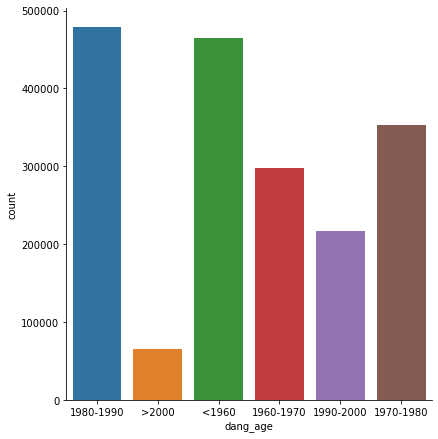

In [124]:
sns.catplot(x="dang_age", kind="count", data=users, height=6)

Хуже всех водят старики и люди среднего возраста. Последние наверняка составляют большинство автовладельцев, поэтому и число аварий большое. Дети моложе 2000 года попадают в аварии вместе со взрослыми

Посмотрим еще на количество исходов аварий для каждой из выделенных групп

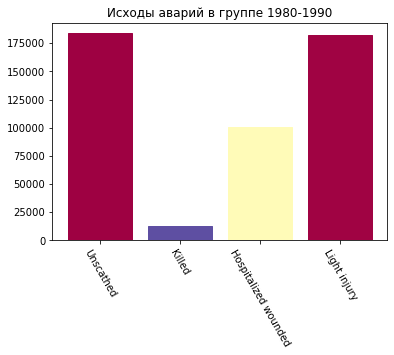

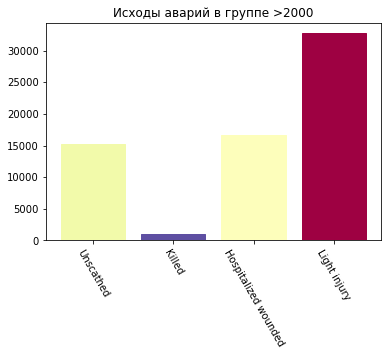

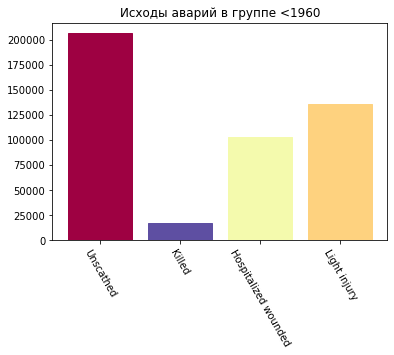

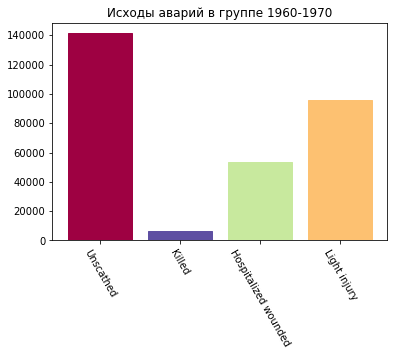

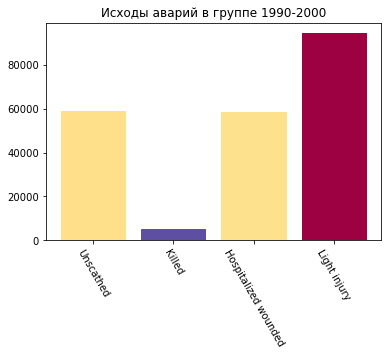

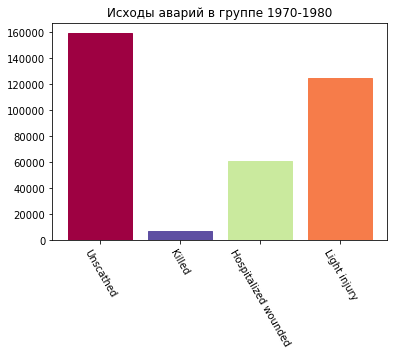

In [125]:
labels = ['Unscathed' ,'Killed','Hospitalized wounded', 'Light injury']

for group in users['dang_age'].unique():
    grav_group = users.loc[users.dang_age == group].groupby('grav')['Num_Acc'].count()
    plot_bar(grav_group, f"Исходы аварий в группе {group}", labels)
    

Здесь видно, что смертность после аварий мала в каждой из групп, а наиболее частыми исходами является "Невредим" и "Легкая травма", что может говорить о том, что аварии происходят в основном при небольших скоростях. Выше мы видели, что аварии происходят в основном не на поворотах, а на прямых участках дороги, поэтому в дальнейшем нужно будет проверить число аварий пешеход-авто и авто-авто.

### *places.csv*

In [126]:
places.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839972 entries, 0 to 839984
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839972 non-null  int64  
 1   catr     839971 non-null  float64
 2   voie     780902 non-null  object 
 3   v1       332814 non-null  float64
 4   v2       33953 non-null   object 
 5   circ     839174 non-null  float64
 6   nbv      838182 non-null  float64
 7   pr       414761 non-null  float64
 8   pr1      413454 non-null  float64
 9   vosp     838332 non-null  float64
 10  prof     838911 non-null  float64
 11  plan     838896 non-null  float64
 12  lartpc   830428 non-null  float64
 13  larrout  831694 non-null  float64
 14  surf     838955 non-null  float64
 15  infra    838694 non-null  float64
 16  situ     838970 non-null  float64
 17  env1     838696 non-null  float64
dtypes: float64(15), int64(1), object(2)
memory usage: 121.8+ MB


Много значений пропущено в столбцах voie, v1, v2 -номер дороги, индекс маршрута цифрами и буквами, их, также как и в первом датасете - убираем; (pr, pr1 - я не нашел, что такое Home PR number, просто не знаю как истолковать) 

In [127]:
places.drop(columns=['voie', 'v1', 'v2', 'pr', 'pr1'], inplace=True)

In [128]:
places.head(5)

Num_Acc  catr  circ  nbv  vosp  prof  plan  lartpc  larrout  surf  \
0  201600000001   3.0   2.0  0.0   0.0   1.0   3.0     0.0      0.0   1.0   
1  201600000002   3.0   1.0  0.0   0.0   1.0   2.0     0.0     58.0   1.0   
2  201600000003   3.0   2.0  2.0   0.0   1.0   3.0     0.0     68.0   2.0   
3  201600000004   4.0   2.0  0.0   0.0   1.0   1.0     0.0      0.0   1.0   
4  201600000005   4.0   0.0  0.0   0.0   0.0   1.0     0.0      0.0   1.0   

   infra  situ  env1  
0    0.0   1.0   0.0  
1    0.0   1.0   0.0  
2    0.0   3.0  99.0  
3    0.0   1.0  99.0  
4    0.0   1.0   3.0

In [129]:
places.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839972 entries, 0 to 839984
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839972 non-null  int64  
 1   catr     839971 non-null  float64
 2   circ     839174 non-null  float64
 3   nbv      838182 non-null  float64
 4   vosp     838332 non-null  float64
 5   prof     838911 non-null  float64
 6   plan     838896 non-null  float64
 7   lartpc   830428 non-null  float64
 8   larrout  831694 non-null  float64
 9   surf     838955 non-null  float64
 10  infra    838694 non-null  float64
 11  situ     838970 non-null  float64
 12  env1     838696 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 89.7 MB


Прежде, чем заполнять остальные пропуски и анализировать нули, снова посмотрим как распредены внутри них значения

In [130]:
cols_to_fill = ['catr', 'circ', 'nbv', 'vosp', 'prof', 'plan',
                'lartpc', 'larrout', 'surf', 'infra', 'situ', 'env1'
                ]

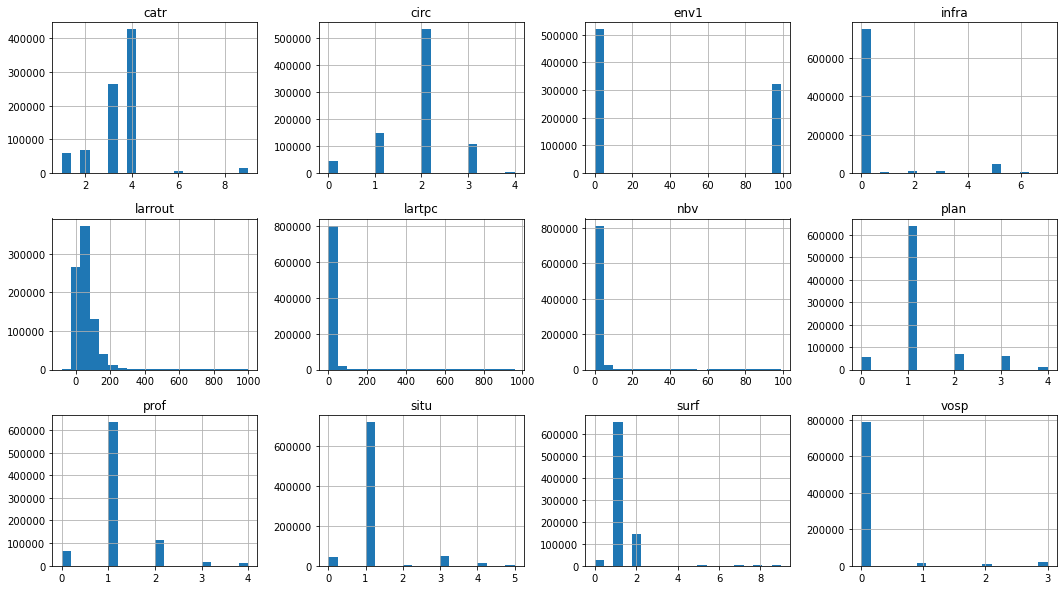

In [131]:
_ = places.hist(column=cols_to_fill,
            figsize=(18, 10), layout=(3, 4),
            bins=20
           )

Большая проблема, что здесь много нулевых значений во всех признаках, хотя их быть не должно, попробуем 
дополнить нули и пропуски значением моды

In [132]:
for mod in cols_to_fill:
    places[mod].fillna(value=places[mod].mode()[0], inplace=True)

    
# В заполнении нулей нужно учесть что мода может оказаться нулем, чего не должно быть
for mod in cols_to_fill:
    places[mod].replace(0, value=places.loc[places[mod] > 0, mod].mode()[0], inplace=True)

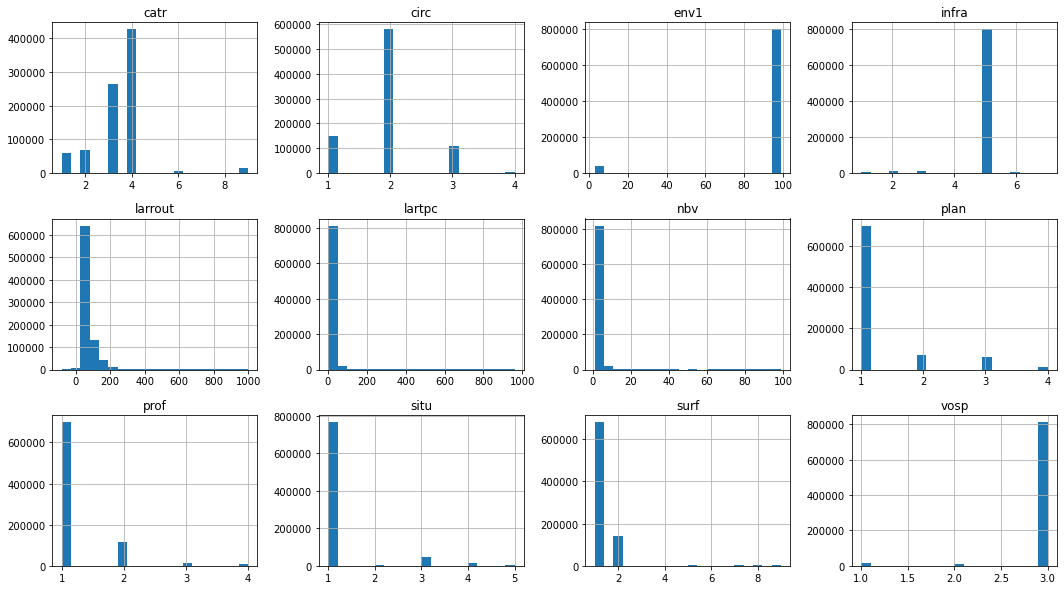

In [133]:
_ = places.hist(column=cols_to_fill,
            figsize=(18, 10), layout=(3, 4),
            bins=20
           )

Информация в датасете *vehicles.csv* впринципе плохо структуирована и для больше половины данных нет описания на сайте, а те, что есть повторяются в датасете *caracteristics.csv*, поэтому я решил пока не использовать этот датасет

В рамках данного датасета посмотрим на опять же число аварий только в зависимости от инфраструктуры и ситуации

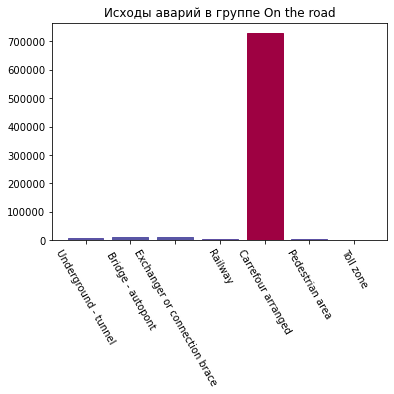

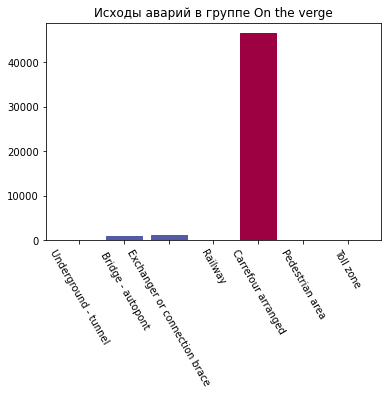

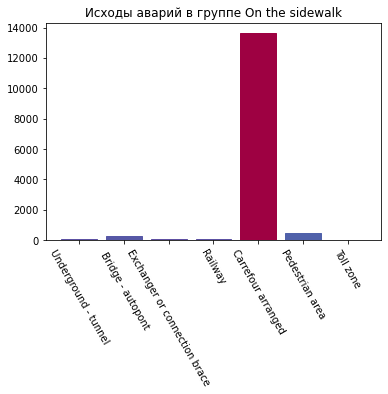

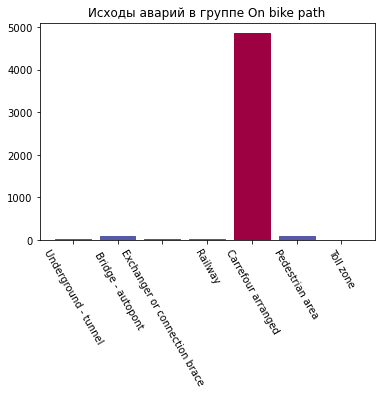

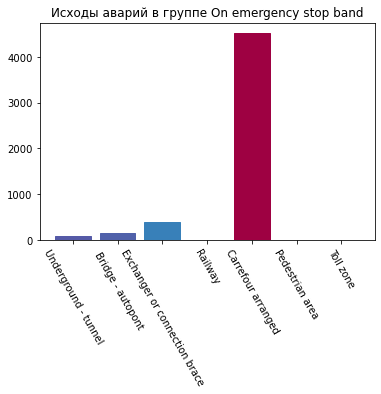

In [134]:
labels_situ = ['On the road', 'On emergency stop band', 'On the verge', 'On the sidewalk', 'On bike path']
labels_infra = ['Underground - tunnel',' Bridge - autopont', 'Exchanger or connection brace', 'Railway', 'Carrefour arranged', 'Pedestrian area', 'Toll zone']

for group in places['situ'].unique():
    temp = places.loc[places.situ == group].groupby('infra',)['Num_Acc'].count()
    plot_bar(temp, f"Исходы аварий в группе {labels_situ[int(group-1)]}", labels_infra)
    

Здесь вышло, что много аварий происходит около Carrefour arranged. Пока не могу сказать, правильно это или нет. Возможно, здесь нужно хитрее заполнить нули или просто не рассматривать при построении этой выборки. Дело в том, что их изначально было очень много, а в остальных случаях хоть и была мода, но она не так сильно выделялась, но при заполнении туда влилось очень много нулей

In [135]:
places = pd.read_csv('data/places.csv', low_memory=False, encoding="latin-1")
places.drop(index=index_to_drop(places.Num_Acc, index_num_acc), inplace=True)

In [136]:
places.drop(columns=['voie', 'v1', 'v2', 'pr', 'pr1'], inplace=True)

In [137]:
for mod in cols_to_fill:
    places[mod].fillna(value=places[mod].mode()[0], inplace=True)

Теперь попробуем просто проигнорировать nan и нули

In [138]:
for mod in ['infra', 'situ']:
    places = places.loc[places[mod] != 0.0]

In [139]:
places.shape

(85987, 13)

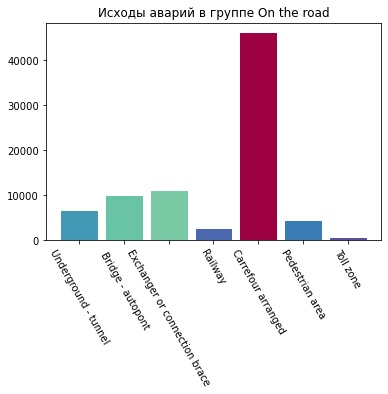

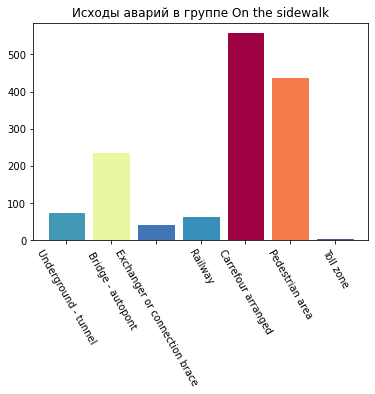

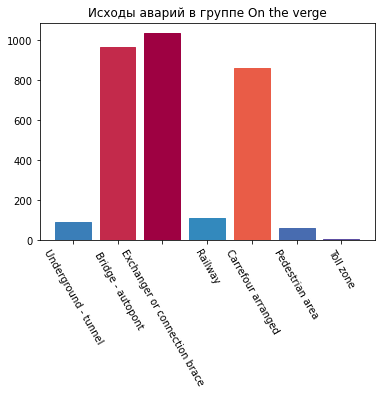

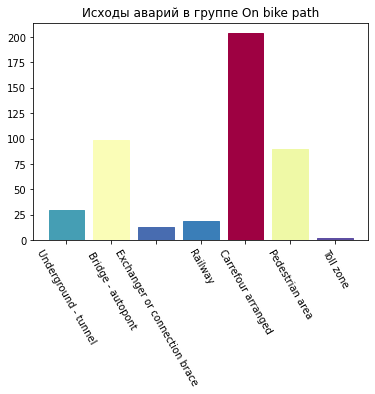

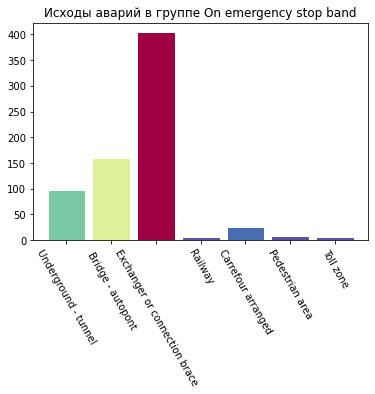

In [140]:
labels_situ = ['On the road', 'On emergency stop band', 'On the verge', 'On the sidewalk', 'On bike path']
labels_infra = ['Underground - tunnel',' Bridge - autopont', 'Exchanger or connection brace', 'Railway', 'Carrefour arranged', 'Pedestrian area', 'Toll zone']

for group in places['situ'].unique():
    temp = places.loc[places.situ == group].groupby('infra',)['Num_Acc'].count()
    plot_bar(temp, f"Исходы аварий в группе {labels_situ[int(group-1)]}", labels_infra)
    

Для ситуаций на дороге и велопути Carrefour arranged остался наибольшим, для пешеходных зон тоже, но уже ненамного. Около полосы аварийной остановки (On emergency stop band) наибольшим теперь является Exchanger or connection brace, а для аварий на обочине (on verge) примерно три варианта реализуются одинаковое число раз. В результате получается, что при большом значении пропущенных данных неправильно заменять их модой, нужно либо отбрасывать эти значения из рассмотрения, либо использовать значения других признаков, чтобы точнее восстанавливать эти пробелы

Я привел в основном только гистограммные распределения характеристик датасетов, так как он полностью состоит из категориальных признаков. Пока я не придумал хороших метрик (не особо пока разобрался как их нужно конструировать) для грамотного анализа этих датасетов. Дальше я хотел бы попробовать связать этих датасеты, чтобы создать свои числовые признаки и уже используя их продолжить изучать эти данные